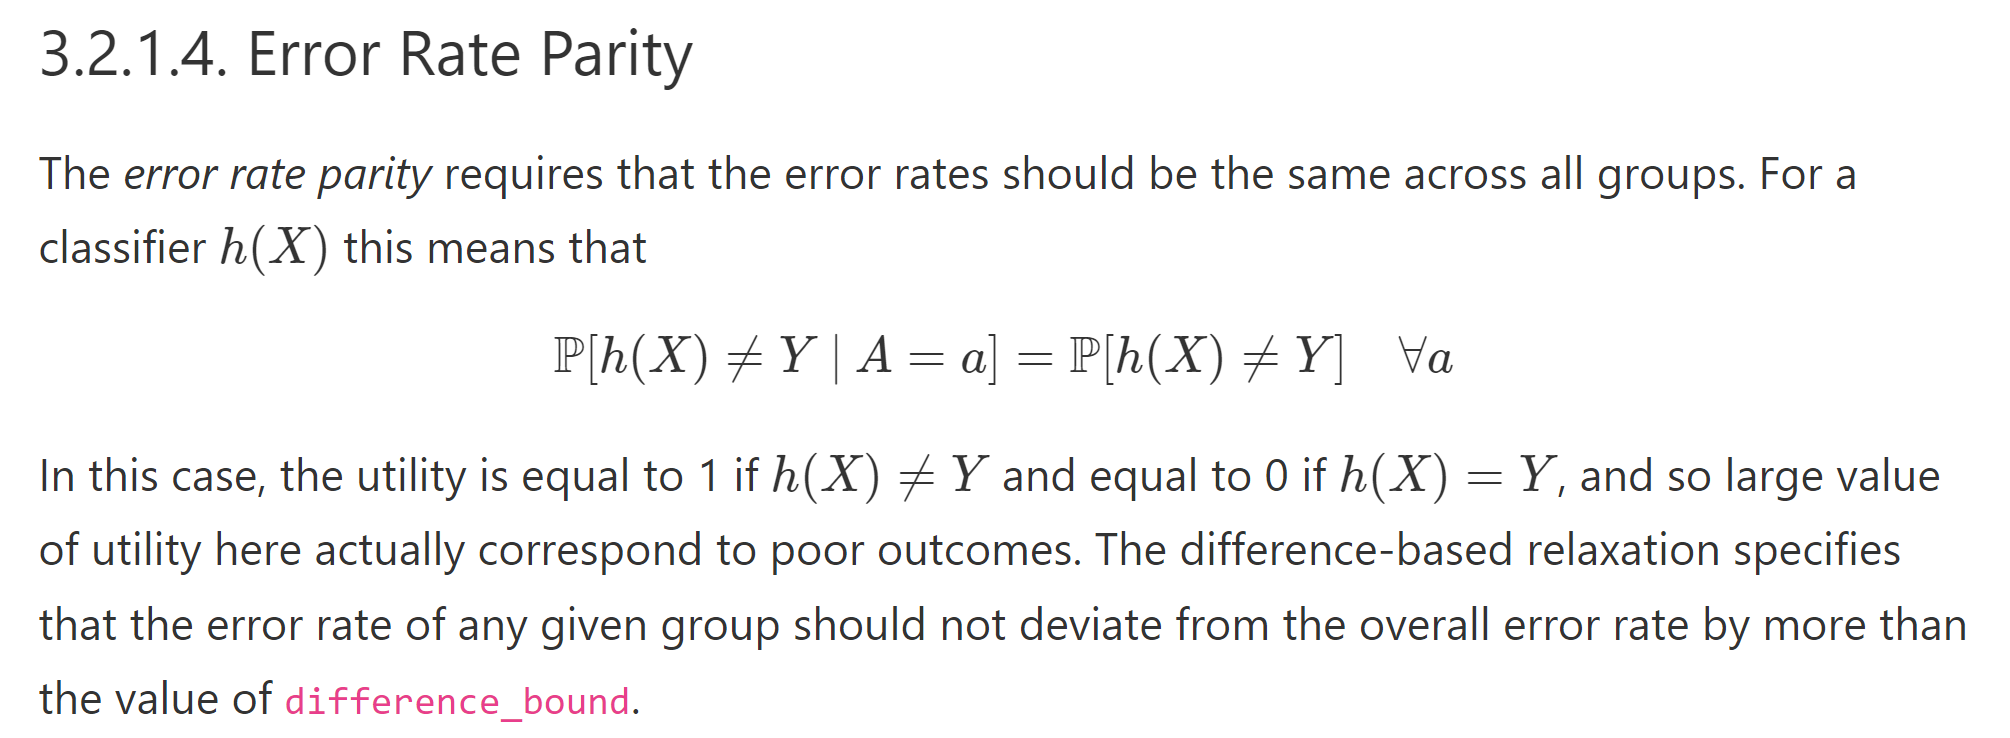

# The choice of parity constraint depends on the technique being used and the specific fairness criteria you want to apply. Constraints in Fairlearn include:

**Demographic parity**: Use this constraint with any of the mitigation algorithms to minimize disparity in the selection rate across sensitive feature groups. For example, in a binary classification scenario, this constraint tries to ensure that an equal number of positive predictions are made in each group.

**True positive rate parity**: Use this constraint with any of the mitigation algorithms to minimize disparity in true positive rate across sensitive feature groups. For example, in a binary classification scenario, this constraint tries to ensure that each group contains a comparable ratio of true positive predictions.

**False-positive rate parity**: Use this constraint with any of the mitigation algorithms to minimize disparity in false_positive_rate across sensitive feature groups. For example, in a binary classification scenario, this constraint tries to ensure that each group contains a comparable ratio of false-positive predictions.

**Equalized odds**: Use this constraint with any of the mitigation algorithms to minimize disparity in combined true positive rate and false_positive_rate across sensitive feature groups. For example, in a binary classification scenario, this constraint tries to ensure that each group contains a comparable ratio of true positive and false-positive predictions.

**Error rate parity**: Use this constraint with any of the reduction-based mitigation algorithms (Exponentiated Gradient and Grid Search) to ensure that the error for each sensitive feature group does not deviate from the overall error rate by more than a specified amount.

**Bounded group loss**: Use this constraint with any of the reduction-based mitigation algorithms to restrict the loss for each sensitive feature group in a regression model.

 trade-off between raw predictive performance and fairness

fairness is measured by a reduction in the disparity of feature selection (for example, ensuring that an equal proportion of members from each gender group is approved for a bank loan) or by a reduction in the disparity of performance metric (for example, ensuring that a model is equally accurate at identifying repayers and defaulters in each age group).

In [11]:
from fairlearn.reductions import TruePositiveRateParity
from fairlearn.metrics import true_positive_rate
import numpy as np
import pandas as pd
from collections import Counter
from fairlearn.metrics import (
    MetricFrame,
    false_positive_rate,
    true_positive_rate,
    selection_rate,
    count
)
from fairlearn.reductions import ErrorRateParity
from sklearn.metrics import accuracy_score
X                  = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])
y_true             = np.array([ 1 ,  1 ,  1 ,  1 ,  1,   1 ,  1 ,  0 ,  0 ,  0 ])
y_pred             = np.array([ 1 ,  1 ,  1 ,  1 ,  0,   0 ,  0 ,  1 ,  0 ,  0 ])
sensitive_features = np.array(["a", "b", "a", "a", "b", "a", "b", "b", "a", "b"])
accuracy_summary = MetricFrame(accuracy_score,
                               y_true, y_pred,
                               sensitive_features=sensitive_features)
accuracy_summary.overall


C:\Users\deepasaw\Anaconda3\lib\site-packages\fairlearn\metrics\_metric_frame.py:63: FutureWarning: You have provided 'metrics', 'y_true', 'y_pred' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.
  warnings.warn(f"You have provided {args_msg} as positional arguments. "


0.6

In [12]:
accuracy_summary.by_group

sensitive_feature_0
a    0.8
b    0.4
Name: accuracy_score, dtype: object

In [13]:
erp = ErrorRateParity(difference_bound=0.01)
erp.load_data(X, y_true, sensitive_features=sensitive_features)
erp.gamma(lambda X: y_pred)

sign  event  group_id
+     all    a          -0.2
             b           0.2
-     all    a           0.2
             b          -0.2
dtype: float64

In [14]:
from fairlearn.reductions import ErrorRateParity
erp = ErrorRateParity(ratio_bound=0.9, ratio_bound_slack=0.01)
erp.load_data(X, y_true, sensitive_features=sensitive_features)
erp.gamma(lambda X: y_pred)

sign  event  group_id
+     all    a          -0.22
             b           0.14
-     all    a           0.16
             b          -0.24
dtype: float64